## **House Prediction Model**


### **Import Modules**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### **Function to Load the Dataset**


In [2]:
def load_dataset(path='USA_Housing.csv'):
    """
    Load Dataset Function

    This function loads a dataset from a CSV file and returns it as a Pandas DataFrame.

    Parameters:
    - path (str, optional): The file path to the CSV file containing the dataset. Default is 'USA_Housing.csv'.

    Returns:
    - pd.DataFrame: A Pandas DataFrame containing the loaded dataset.

    Example:
    >>> dataset = load_dataset('path/to/your/dataset.csv')
    >>> print(dataset.head())

    Description:
    - The function uses the Pandas library to read the dataset from a CSV file.
    - The default path is set to 'USA_Housing.csv', but you can specify a different file path using the 'path' parameter.
    - The loaded dataset is returned as a Pandas DataFrame, which is a two-dimensional labeled data structure with columns that can be of different types.

    Note:
    - Ensure that the specified CSV file exists at the provided path.
    - If the 'path' parameter is not provided, the function will attempt to load 'USA_Housing.csv' from the current working directory.
    """
    # Load the dataset
    dataset = pd.read_csv(path)
    return dataset

### **Function to Visualize Null Values**


In [3]:
def generate_heatmap_to_visualize_null(dataset):
    """
    Generate Heatmap to Visualize Null Values

    This function generates a visually appealing heatmap to visualize the presence of null values in the provided dataset.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame for which the null values need to be visualized.

    Returns:
    - None: The function displays the heatmap using Matplotlib.

    Example:
    >>> generate_heatmap_to_visualize_null(my_dataset)

    Description:
    - The function uses the Seaborn library to create a heatmap.
    - The 'sns.heatmap' function is applied to the boolean mask generated by 'dataset.isnull()', where True represents null values.
    - 'yticklabels=False' removes y-axis tick labels for better readability.
    - 'cbar=False' removes the colorbar, as it is not needed for this visualization.
    - 'cmap='Blues'' sets the color map to a blue gradient for a visually appealing display.
    - The title 'Missing Data in the dataset' is set for the plot.
    - The 'plt.show()' function is used to display the generated heatmap.
    - A white grid is added for better visibility of individual cells.

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame.
    """
    # Set a custom color palette for better visibility
    custom_palette = sns.light_palette("#3498db", as_cmap=True)

    # Display the heatmap of the dataset with improved aesthetics
    sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False,
                cmap=custom_palette, linewidths=0.5, linecolor='white')

    # Set the title for the plot
    plt.title('Missing Data in the dataset', fontsize=16)

    # Show the generated heatmap
    plt.show()

### **Function to Remove Unwanted and Unneccessary Features**


In [4]:
def remove_features(features, dataset):
    """
    Remove Features from Dataset

    This function removes specified features from the provided dataset.

    Parameters:
    - features (list): A list of feature names to be removed from the dataset.
    - dataset (pd.DataFrame): The input Pandas DataFrame from which features need to be removed.

    Returns:
    - pd.DataFrame: A new Pandas DataFrame with the specified features removed.

    Example:
    >>> updated_dataset = remove_features(['feature1', 'feature2'], my_dataset)
    >>> print(updated_dataset.head())

    Description:
    - The function uses the Pandas 'drop' method to remove the specified features along the specified axis (axis=1 for columns).
    - The 'features' parameter should be a list containing the names of features to be removed.
    - The 'dataset' parameter is the input Pandas DataFrame from which features are removed.
    - The updated dataset with removed features is returned as a new Pandas DataFrame.

    Note:
    - Ensure that the 'features' parameter contains valid feature names present in the dataset.
    - The original dataset remains unchanged; the function returns a modified copy.
    """
    # Remove the specified features from the dataset
    updated_dataset = dataset.drop(features, axis=1)

    # Return the updated dataset
    return updated_dataset

### **Function to Drop NULL and Missing Values**


In [5]:
def drop_missing_values(dataset):
    """
    Drop Missing Values from Dataset

    This function removes rows containing missing values from the provided dataset.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame with missing values.

    Returns:
    - pd.DataFrame: A new Pandas DataFrame with rows containing missing values removed.

    Example:
    >>> clean_dataset = drop_missing_values(my_dataset)
    >>> print(clean_dataset.head())

    Description:
    - The function uses the Pandas 'dropna' method to remove rows containing missing values.
    - The 'inplace=True' parameter modifies the original dataset in place and does not return a new DataFrame.
    - The updated dataset with missing values removed is returned for convenience.

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame.
    - Use this function carefully, as it modifies the original dataset.
    """
    # Drop rows with missing values from the dataset
    dataset.dropna(inplace=True)

    # Return the updated dataset
    return dataset

### **Function to Split Features and Target Variable**


In [6]:
def split_target_features(dataset):
    """
    Split Dataset into Target and Features

    This function separates the target variable and features from the provided dataset.

    Parameters:
    - dataset (pd.DataFrame): The input Pandas DataFrame containing both the target variable and features.

    Returns:
    - pd.DataFrame, pd.Series: Returns a tuple containing two elements:
        - X (pd.DataFrame): The features without the target variable.
        - y (pd.Series): The target variable.

    Example:
    >>> X_features, y_target = split_target_features(my_dataset)
    >>> print(X_features.head())
    >>> print(y_target.head())

    Description:
    - The function uses the Pandas 'drop' method to create a new DataFrame (X) with features by excluding the 'Price' column.
    - The 'Price' column is selected as the target variable (y) and returned as a Pandas Series.
    - The function returns a tuple containing X (features) and y (target variable).

    Note:
    - Ensure that the 'dataset' parameter is a Pandas DataFrame containing the 'Price' column.
    """
    # Split the dataset into features (X) and target variable (y)
    X = dataset.drop('Price', axis=1)
    y = dataset['Price']

    # Return the features and target variable as a tuple
    return X, y

### **Function to Standardize Features**


In [7]:
def transform_x(X):
    """
    Standardize Features using StandardScaler

    This function standardizes the features in the input DataFrame using the StandardScaler from scikit-learn.

    Parameters:
    - X (pd.DataFrame): The input Pandas DataFrame containing features to be standardized.

    Returns:
    - np.ndarray: Returns a NumPy array with standardized features.

    Example:
    >>> X_standardized = transform_x(my_features)
    >>> print(X_standardized[:5])

    Description:
    - The function uses the StandardScaler from scikit-learn to standardize the features in the input DataFrame.
    - The 'fit' method calculates the mean and standard deviation of each feature, and the 'transform' method standardizes the features.
    - The standardized features are returned as a NumPy array.

    Note:
    - Ensure that the input 'X' is a Pandas DataFrame containing numerical features.
    """
    # Fit and transform the features using StandardScaler
    pre_process = preprocessing.StandardScaler().fit(X)
    X_transform = pre_process.transform(X)

    # Return the standardized features as a NumPy array
    return X_transform

### **Function to Standardize Target Variable**


In [8]:
def transform_y(y):
    """
    Standardize Target Variable using StandardScaler

    This function standardizes the target variable in the input Pandas Series using the StandardScaler from scikit-learn.

    Parameters:
    - y (pd.Series): The input Pandas Series representing the target variable to be standardized.

    Returns:
    - np.ndarray: Returns a NumPy array with standardized target variable.

    Example:
    >>> y_standardized = transform_y(my_target)
    >>> print(y_standardized[:5])

    Description:
    - The function reshapes the input Pandas Series to a 2D array using the 'values.reshape' method.
    - The StandardScaler from scikit-learn is used to fit and transform the reshaped target variable.
    - The standardized target variable is returned as a NumPy array.

    Note:
    - Ensure that the input 'y' is a Pandas Series representing a numerical target variable.
    """
    # Reshape the target variable to a 2D array
    y_reshaped = y.values.reshape(-1, 1)

    # Fit and transform the reshaped target variable using StandardScaler
    pre_process = preprocessing.StandardScaler().fit(y_reshaped)
    y_transform = pre_process.transform(y_reshaped)

    # Return the standardized target variable as a NumPy array
    return y_transform

### **Function to Split Data into Training and Testing Sets**


In [9]:
def split_train_test_data(X, y):
    """
    Split Data into Training and Testing Sets

    This function splits the input features (X) and target variable (y) into training and testing sets.

    Parameters:
    - X (np.ndarray): The input features to be split into training and testing sets.
    - y (np.ndarray): The target variable to be split into training and testing sets.

    Returns:
    - np.ndarray, np.ndarray, np.ndarray, np.ndarray: Returns a tuple containing four elements:
        - X_train (np.ndarray): The features for training.
        - X_test (np.ndarray): The features for testing.
        - y_train (np.ndarray): The target variable for training.
        - y_test (np.ndarray): The target variable for testing.

    Example:
    >>> X_train, X_test, y_train, y_test = split_train_test_data(my_features, my_target)
    >>> print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    Description:
    - The function uses the 'train_test_split' method from scikit-learn to split features and target variable into training and testing sets.
    - The 'test_size' parameter specifies the proportion of the dataset to include in the test split (default is 0.20).
    - The 'random_state' parameter ensures reproducibility of the split.
    - The function returns four NumPy arrays representing the training and testing sets for features and target variable.

    Note:
    - Ensure that 'X' and 'y' are NumPy arrays.
    """
    # Split features and target variable into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=101)

    # Return the training and testing sets as a tuple
    return X_train, X_test, y_train, y_test

### **Function to Create and Train the Linear Regression Model**


In [10]:
def create_train_model(X_train, y_train):
    """
    Create and Train Linear Regression Model

    This function creates a Linear Regression model and trains it using the provided training features and target variable.

    Parameters:
    - X_train (np.ndarray): The features for training the model.
    - y_train (np.ndarray): The target variable for training the model.

    Returns:
    - LinearRegression: Returns a trained Linear Regression model.

    Example:
    >>> linear_model = create_train_model(X_train, y_train)
    >>> print(linear_model.coef_, linear_model.intercept_)

    Description:
    - The function initializes a Linear Regression model using the 'LinearRegression' class from scikit-learn.
    - The 'fit' method is then used to train the model with the provided training features (X_train) and target variable (y_train).
    - The trained Linear Regression model is returned for further use.

    Note:
    - Ensure that 'X_train' and 'y_train' are NumPy arrays representing the training features and target variable.
    """
    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model with the provided features and target variable
    model.fit(X_train, y_train)

    # Return the trained Linear Regression model
    return model

### **Function to Test the Model**


In [11]:
def test_model(model, X_test):
    """
    Test Trained Model

    This function uses a trained regression model to make predictions on the provided test features.

    Parameters:
    - model (object): The trained regression model.
    - X_test (np.ndarray): The features for testing the model.

    Returns:
    - np.ndarray: Returns an array containing the predicted values.

    Example:
    >>> predictions = test_model(linear_model, X_test)
    >>> print(predictions[:5])

    Description:
    - The function uses the 'predict' method of the trained model to make predictions on the provided test features.
    - The predicted values are returned as a NumPy array.

    Note:
    - Ensure that 'model' is a trained regression model (e.g., Linear Regression) and 'X_test' is a NumPy array.
    """
    # Use the trained model to make predictions on the test features
    y_pred = model.predict(X_test)

    # Return the predicted values as a NumPy array
    return y_pred

### **Function to Compare Actual and Predicted Values**


In [12]:
def view_actual_predicted_values(y_test, y_pred):
    """
    View Actual and Predicted Values

    This function displays a side-by-side comparison of actual and predicted values.

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - np.ndarray: Returns the actual values for further analysis or visualization.

    Example:
    >>> actual_values = view_actual_predicted_values(y_test, predictions)

    Description:
    - The function combines the actual and predicted values into a single NumPy array using 'np.column_stack'.
    - The actual and predicted values are then displayed side by side in a formatted table.
    - The actual values are returned for further analysis or visualization.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Combine actual and predicted values into a single NumPy array
    results = np.column_stack((y_test, y_pred))

    # Display the actual and predicted values in a formatted table
    print("Actual Values  |  Predicted Values")
    print("----------------------------------")
    for actual, predicted in results:
        print(f"{actual:14.2f} |  {predicted:12.2f}")
        print("----------------------------------")

    # Return the actual values for further analysis or visualization
    return y_test

### **Function to Perform Residual Analysis**


In [13]:
def residual_analysis(y_test, y_pred):
    """
    Residual Analysis

    This function performs residual analysis by calculating residuals and visualizing their distribution.

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - None: Displays a residual analysis plot using Seaborn and Matplotlib.

    Example:
    >>> residual_analysis(y_test, predictions)

    Description:
    - The function calculates residuals by subtracting predicted values from actual values.
    - Residuals are then visualized using a distribution plot created with Seaborn.
    - The resulting plot provides insights into the distribution and patterns of residuals.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Calculate residuals by subtracting predicted values from actual values
    residuals = y_test - y_pred.reshape(-1)

    # Display a distribution plot of residuals
    sns.distplot(residuals, kde=True)

    # Set title for the plot
    plt.title('Residual Analysis')

    # Show the plot
    plt.show()

### **Function to Visualize Data Points with Line**


In [14]:
def visualize_data_points_line(y_test, y_pred):
    """
    Visualize Actual vs. Predicted Data Points

    This function creates a scatter plot comparing actual vs. predicted values with an ideal line.

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - None: Displays a scatter plot with an ideal line using Seaborn and Matplotlib.

    Example:
    >>> visualize_data_points_line(y_test, predictions)

    Description:
    - The function uses Seaborn to create a scatter plot with actual values on the x-axis and predicted values on the y-axis.
    - An ideal line is added to the plot, represented by a red line passing through points (min(y_test), min(y_test)) to (max(y_test), max(y_test)).
    - The plot provides a visual representation of how well the predicted values align with the actual values.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Create a scatter plot with actual vs. predicted values
    sns.scatterplot(x=y_test, y=y_pred, color='blue',
                    label='Actual Data points')

    # Add an ideal line to the plot
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             color='red', label='Ideal Line')

    # Set labels and title for the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted (Linear Regression)')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

### **Function to Evaluate the Model**


In [15]:
def evaluate_model(y_test, y_pred):
    """
    Evaluate Regression Model

    This function evaluates the performance of a regression model using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

    Parameters:
    - y_test (np.ndarray): The actual values from the test set.
    - y_pred (np.ndarray): The predicted values from the model.

    Returns:
    - float, float: Returns a tuple containing two elements:
        - mse (float): Mean Squared Error.
        - rmse (float): Root Mean Squared Error.

    Example:
    >>> mse, rmse = evaluate_model(y_test, predictions)
    >>> print(f'Mean Squared Error: {mse:.2f}, Root Mean Squared Error: {rmse:.2f}')

    Description:
    - The function uses the scikit-learn 'mean_squared_error' function to calculate Mean Squared Error (MSE).
    - Root Mean Squared Error (RMSE) is then calculated by taking the square root of MSE.
    - Both MSE and RMSE are returned for model evaluation.

    Note:
    - Ensure that 'y_test' and 'y_pred' are NumPy arrays of the same length.
    """
    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)

    # Return MSE and RMSE as a tuple
    return mse, rmse

### **Function to Save Model**


In [16]:

def save_model(model):
    """
    Save Trained Model

    This function saves a trained regression model as a pickle file.

    Parameters:
    - model (object): The trained regression model.

    Returns:
    - None: Saves the trained regression model as a pickle file.

    Example:
    >>> save_model(linear_model)

    Description:
    - The function saves the trained regression model as a pickle file.

    Note:
    - Ensure that'model' is a trained regression model (e.g., Linear Regression).
    """
    # Save the trained model as a pickle file
    filename = 'linear_regression_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

### **Load the Dataset**


In [17]:
dataset = load_dataset()

### **Basic Exploratory Data Analysis (EDA)**


In [18]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**Display the shape of the dataset**


In [19]:
dataset.shape

(5000, 7)

**Display information about the dataset**


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Generate descriptive statistics for the dataset**


In [21]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### **Data Preprocessing**


**Drop the 'Address' feature as it is assumed to have no impact on the price**


In [22]:
features = ['Address']
dataset = remove_features(features, dataset)

**Display the modified dataset**


In [23]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


**Drop rows with missing values**


In [24]:
dataset = drop_missing_values(dataset)

**Confirm the dropping missing values affect on the dataset**


In [25]:
dataset.shape

(5000, 6)

**Identify the target variable**


In [26]:
target = 'Price'

**Split the dataset into features (X) and target variable (y)**


In [27]:
X, y = split_target_features(dataset)

**Display the shape of X and y**


In [28]:
X.shape, y.shape

((5000, 5), (5000,))

In [29]:
X_transformed = transform_x(X)
y.values.reshape(-1, 1).shape
y_transformed = transform_y(y)

**Split the data into training and testing sets**


In [30]:
X_train, X_test, y_train, y_test = split_train_test_data(
    X_transformed, y_transformed)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 5), (1000, 5), (4000, 1), (1000, 1))

### **Building the Initial Model**


**Create and train the linear regression model**


In [32]:
model = create_train_model(X_train, y_train)

**Test the model and make predictions**


In [33]:
y_pred = test_model(model, X_test)

**Display the shape and values of predicted prices**


In [34]:
y_pred.shape, y_pred

((1000, 1),
 array([[ 7.32041057e-02],
        [-1.16108970e+00],
        [ 1.44044713e+00],
        [-7.35297452e-01],
        [-6.75905821e-01],
        [-1.66518276e+00],
        [-4.47943319e-01],
        [-1.06345925e+00],
        [ 6.03954356e-01],
        [-7.85382400e-02],
        [ 6.33619413e-01],
        [ 1.88296044e-01],
        [ 1.42700913e+00],
        [ 2.96965092e-01],
        [ 4.40590685e-01],
        [-2.73841993e-02],
        [-1.75111113e+00],
        [-7.59423795e-01],
        [-3.08011000e-02],
        [-9.62978808e-02],
        [-2.05677467e+00],
        [ 1.52098781e+00],
        [ 1.76108655e+00],
        [-8.97896833e-02],
        [-4.72817582e-01],
        [ 1.64256621e+00],
        [ 1.51979807e+00],
        [ 5.88667787e-01],
        [ 4.39499053e-01],
        [ 8.75449510e-01],
        [-1.43211322e+00],
        [ 1.47961236e+00],
        [ 6.51726422e-01],
        [-5.84771555e-01],
        [ 1.49693747e-01],
        [-8.91061508e-01],
        [-1.2752

**Compare the predicted and actual prices side by side.**


In [35]:
actual = view_actual_predicted_values(y_test, y_pred)

Actual Values  |  Predicted Values
----------------------------------
          0.06 |          0.07
----------------------------------
         -1.02 |         -1.16
----------------------------------
          1.32 |          1.44
----------------------------------
         -0.48 |         -0.74
----------------------------------
         -0.80 |         -0.68
----------------------------------
         -1.42 |         -1.67
----------------------------------
         -0.18 |         -0.45
----------------------------------
         -1.49 |         -1.06
----------------------------------
          0.76 |          0.60
----------------------------------
          0.16 |         -0.08
----------------------------------
          0.59 |          0.63
----------------------------------
          0.13 |          0.19
----------------------------------
          1.48 |          1.43
----------------------------------
          0.79 |          0.30
----------------------------------
      

**Perform residual analysis**


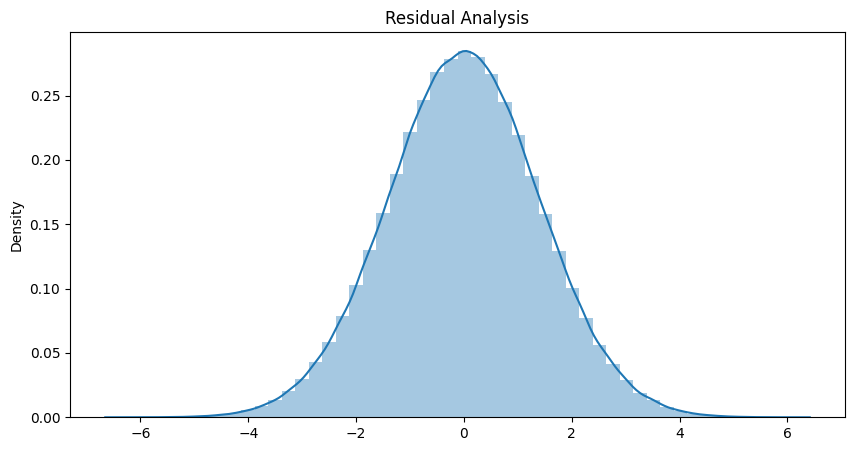

In [36]:
residual_analysis(actual, y_pred)

### **Model Evaluation and Analysis**


**Evaluate the model and calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**


In [38]:
mse, rse = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rse:.2f}')

Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


### **Save the Model**


In [39]:
save_model(model)